In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import os
import numpy as np
import pandas as pd
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_5/models/')
filename = "modelrf_fold5_15AB_15AB_1.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [3]:
dataframe = pd.read_csv('/home/yupaporn/codes/USAI/FeaturesVector_Testset_15AB_fold5_1.csv')
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.043854,0.393159,0.304278,-0.036160,0.544054,-0.000206,-0.167042,-0.231836,-0.095257,-0.209335,...,0.189935,-0.187660,0.254432,-0.143165,0.239909,0.248652,Abnormal,P1,FP-A,AB01
1,0.676961,0.539506,-0.053924,0.403699,0.105071,-0.143030,-0.155931,-0.055952,-0.190838,-0.206642,...,-0.039706,-0.168956,0.199440,-0.165889,0.536217,0.070418,Abnormal,P2,FP-A,AB01
2,0.346882,0.424725,0.252443,0.426909,0.190489,-0.144003,0.182589,-0.159089,-0.163857,-0.150981,...,-0.132230,-0.075416,0.079354,-0.116815,0.666763,-0.147672,Abnormal,P41,FP-B,AB01
3,0.099617,0.498541,-0.061557,-0.019714,0.135006,-0.115510,0.022798,-0.202058,-0.177526,-0.169650,...,0.232042,-0.176725,0.056283,0.096251,0.426497,0.027341,Abnormal,P51,FP-C,AB01
4,0.099310,0.451618,0.525713,0.143320,-0.100447,-0.146055,-0.126532,-0.214480,-0.126550,-0.229050,...,-0.127667,-0.003664,0.053332,-0.149171,0.266811,-0.027349,Abnormal,P31,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.501345,0.509983,0.010273,0.291871,0.884599,0.146661,-0.038315,0.180175,0.931387,-0.177702,...,0.258097,-0.188954,0.403903,0.008225,0.188404,0.361884,Normal,P32,FP-B,Normal
1308,-0.152747,-0.075290,-0.174045,-0.065578,0.029139,0.248466,-0.160759,0.308406,0.390728,0.211818,...,-0.085686,-0.020607,0.131717,-0.165150,-0.080348,0.016338,Normal,P42,FP-B,Normal
1309,0.081706,0.200821,-0.098007,1.079061,0.885044,-0.007779,0.200376,-0.183957,0.149963,-0.180854,...,0.755730,-0.119876,1.082201,0.512902,0.247517,0.271869,Normal,P52,FP-C,Normal
1310,-0.093831,-0.038787,-0.000959,-0.003699,-0.155180,0.112617,-0.149938,-0.032900,0.145524,-0.192075,...,0.191409,-0.043052,0.022321,-0.076032,-0.027333,0.328488,Normal,P61,FP-C,Normal


In [4]:
X_test = dataframe.iloc[:,0:2048]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(1312, 2048)
(1312,)


In [5]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,-0.043854,0.393159,0.304278,-0.036160,0.544054,-0.000206,-0.167042,-0.231836,-0.095257,-0.209335,...,-0.148935,-0.233217,0.536825,0.062339,0.189935,-0.187660,0.254432,-0.143165,0.239909,0.248652
1,0.676961,0.539506,-0.053924,0.403699,0.105071,-0.143030,-0.155931,-0.055952,-0.190838,-0.206642,...,-0.128118,-0.175165,0.203274,-0.110801,-0.039706,-0.168956,0.199440,-0.165889,0.536217,0.070418
2,0.346882,0.424725,0.252443,0.426909,0.190489,-0.144003,0.182589,-0.159089,-0.163857,-0.150981,...,-0.093072,-0.208829,0.710372,-0.088379,-0.132230,-0.075416,0.079354,-0.116815,0.666763,-0.147672
3,0.099617,0.498541,-0.061557,-0.019714,0.135006,-0.115510,0.022798,-0.202058,-0.177526,-0.169650,...,-0.139717,-0.217725,0.369546,-0.067933,0.232042,-0.176725,0.056283,0.096251,0.426497,0.027341
4,0.099310,0.451618,0.525713,0.143320,-0.100447,-0.146055,-0.126532,-0.214480,-0.126550,-0.229050,...,-0.100644,-0.228902,0.431256,-0.067204,-0.127667,-0.003664,0.053332,-0.149171,0.266811,-0.027349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.501345,0.509983,0.010273,0.291871,0.884599,0.146661,-0.038315,0.180175,0.931387,-0.177702,...,1.003696,-0.005496,0.137383,0.513774,0.258097,-0.188954,0.403903,0.008225,0.188404,0.361884
1308,-0.152747,-0.075290,-0.174045,-0.065578,0.029139,0.248466,-0.160759,0.308406,0.390728,0.211818,...,0.278662,-0.130674,0.393414,0.112992,-0.085686,-0.020607,0.131717,-0.165150,-0.080348,0.016338
1309,0.081706,0.200821,-0.098007,1.079061,0.885044,-0.007779,0.200376,-0.183957,0.149963,-0.180854,...,0.063954,-0.096180,0.105382,0.642316,0.755730,-0.119876,1.082201,0.512902,0.247517,0.271869
1310,-0.093831,-0.038787,-0.000959,-0.003699,-0.155180,0.112617,-0.149938,-0.032900,0.145524,-0.192075,...,0.731143,-0.100476,-0.099962,0.440270,0.191409,-0.043052,0.022321,-0.076032,-0.027333,0.328488


In [6]:
y_test

0         AB01
1         AB01
2         AB01
3         AB01
4         AB01
         ...  
1307    Normal
1308    Normal
1309    Normal
1310    Normal
1311    Normal
Name: Sub_class, Length: 1312, dtype: object

In [7]:
y_pred = model.predict(X_test)

In [8]:
dataframe['Sub_class_pred'] = y_pred
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class,Sub_class_pred
0,-0.043854,0.393159,0.304278,-0.036160,0.544054,-0.000206,-0.167042,-0.231836,-0.095257,-0.209335,...,-0.187660,0.254432,-0.143165,0.239909,0.248652,Abnormal,P1,FP-A,AB01,Normal
1,0.676961,0.539506,-0.053924,0.403699,0.105071,-0.143030,-0.155931,-0.055952,-0.190838,-0.206642,...,-0.168956,0.199440,-0.165889,0.536217,0.070418,Abnormal,P2,FP-A,AB01,AB01
2,0.346882,0.424725,0.252443,0.426909,0.190489,-0.144003,0.182589,-0.159089,-0.163857,-0.150981,...,-0.075416,0.079354,-0.116815,0.666763,-0.147672,Abnormal,P41,FP-B,AB01,AB01
3,0.099617,0.498541,-0.061557,-0.019714,0.135006,-0.115510,0.022798,-0.202058,-0.177526,-0.169650,...,-0.176725,0.056283,0.096251,0.426497,0.027341,Abnormal,P51,FP-C,AB01,AB01
4,0.099310,0.451618,0.525713,0.143320,-0.100447,-0.146055,-0.126532,-0.214480,-0.126550,-0.229050,...,-0.003664,0.053332,-0.149171,0.266811,-0.027349,Abnormal,P31,FP-B,AB01,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.501345,0.509983,0.010273,0.291871,0.884599,0.146661,-0.038315,0.180175,0.931387,-0.177702,...,-0.188954,0.403903,0.008225,0.188404,0.361884,Normal,P32,FP-B,Normal,Normal
1308,-0.152747,-0.075290,-0.174045,-0.065578,0.029139,0.248466,-0.160759,0.308406,0.390728,0.211818,...,-0.020607,0.131717,-0.165150,-0.080348,0.016338,Normal,P42,FP-B,Normal,Normal
1309,0.081706,0.200821,-0.098007,1.079061,0.885044,-0.007779,0.200376,-0.183957,0.149963,-0.180854,...,-0.119876,1.082201,0.512902,0.247517,0.271869,Normal,P52,FP-C,Normal,Normal
1310,-0.093831,-0.038787,-0.000959,-0.003699,-0.155180,0.112617,-0.149938,-0.032900,0.145524,-0.192075,...,-0.043052,0.022321,-0.076032,-0.027333,0.328488,Normal,P61,FP-C,Normal,Normal


In [9]:
act = dataframe['Sub_class'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
pred = dataframe['Sub_class_pred'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 92.53048780487805%
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       857
           1       0.98      0.80      0.88       455

    accuracy                           0.93      1312
   macro avg       0.94      0.90      0.91      1312
weighted avg       0.93      0.93      0.92      1312



851 6 92 363


Text(0.5, 21.5, 'Predicted label')

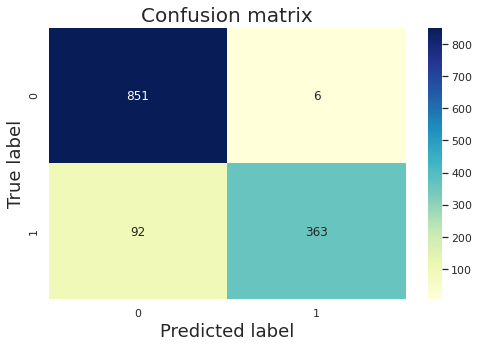

In [10]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print(TN, FP, FN, TP)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [11]:
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print('TN = ', TN)
print('FP = ', FP)
print('FN = ', FN)
print('TP = ', TP)

TN =  851
FP =  6
FN =  92
TP =  363


In [12]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 50  13   0   0   0   0   0   0   0   0   0   0   0   0  11]
 [  7  39   7   0   0   0   0   0   0   0   0   1   0   0   6]
 [  0  10   6   1   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0  28   0   0   0   0   0   0   0   0   0   2  13]
 [  0   0   0   1  17   0   0   0   0   0   0   0   0   1  10]
 [  0   0   0   0   0  10   1   1   0   0   0   0   0   0   9]
 [  0   0   0   0   0   0   9   0   0   0   0   0   0   0  12]
 [  2   0   0   0   0   0   0  19   0   0   0   0   0   2   9]
 [  1   0   0   0   1   0   0   3  16   1   0   0   1   2   3]
 [  0   0   0   1   0   0   0   0   5   3   0   0   0   1   1]
 [  0   0   0   0   0   0   0   0   0   0  18   0   0   2   6]
 [  0   0   0   0   0   0   0   1   0   0   0   4   0   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13   8   2]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0  51   5]
 [  1   1   0   1   2   0   1   0   0   0   0   0   0   0 851]]
              precision    recall  f1-score   support


Text(0.5, 21.5, 'Predicted label')

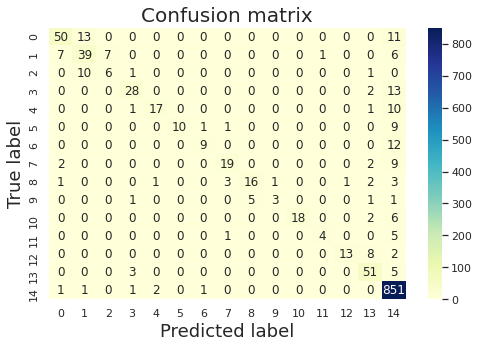

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)